# Analysis Ebay Car Dataset

In this project, I will work with a dataset of used cars from the German classifieds section of the eBay website called *eBay Kleinanzeigen*. This dataset you may find at [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data). But there's some transformation with data. First of all, the dataset was dirtied to be more closely to the scraped dataset from real-life data. The second, just to run code quickly, there are 50,000 data points randomly sampled.

This project aims to clean the data and analyze the included used car listings using Pandas and Numpy.

Let's import libraries and read the dataset using `Latin-1` encoding

In [163]:
import pandas as pd
import numpy as np
autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

Find out more about this dataset using methods `.info()`

In [164]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Description of what particular column means:

* **dateCrawled** - When this ad was first crawled. All field-values are taken from this date.
* **name** - Name of the car.
* **seller** - Whether the seller is private or a dealer.
* **offerType** - The type of listing
* **price** - The price on the ad to sell the car.
* **abtest** - Whether the listing is included in an A/B test.
* **vehicleType** - The vehicle Type.
* **yearOfRegistration** - The year in which the car was first registered.
* **gearbox** - The transmission type.
* **powerPS** - The power of the car in PS.
* **model** - The car model name.
* **kilometer** - How many kilometers the car has driven.
* **monthOfRegistration** - The month in which the car was first registered.
* **fuelType** - What type of fuel the car uses.
* **brand** - The brand of the car.
* **notRepairedDamage** - If the car has a damage which is not yet repaired.
* **dateCreated** - The date on which the eBay listing was created.
* **nrOfPictures** - The number of pictures in the ad.
* **postalCode** - The postal code for the location of the vehicle.
* **lastSeenOnline** - When the crawler saw this ad last online.

In [165]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

___
We can see that our dataset has 20 columns and 50000 rows in total, 15 variables with *object* type (strings) and five *integer* variables. We may also notice that some of the columns have null entries.

Also the column names use camelcase instead of preferred in Python snakecase. 

Let's start cleaning data and firstly convert column names from camelcase to snakecase and reword some of the column names to be more descriptive

In [166]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [167]:
new_columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_PS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']
autos.columns = new_columns
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_PS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

# Data cleaning

Next step is to explore data to determine what other cleaning tasks need to be done. We will look for: 1) text columns where all or almost all values the same (this is often unuseful information and can be dropped), 2) Nan variables, 3) examples of numeric data stored as text which can be cleaned and converted.
___
But first of all, Let's translate all of the string variables from German to the English language using `.map()` method.

For vehicle type:

In [256]:
print(autos['vehicle_type'].unique())
# creating mapping dictionary
mapping_dict = {'bus':'bus', 'limousine':'limousine', 'kleinwagen':'small car', 'kombi':'station wagon', np.nan:'unknown', 'coupe':'coupe', 'suv':'SUV',
       'cabrio':'cabriolet', 'andere':'other'}
autos['vehicle_type'] = autos['vehicle_type'].map(mapping_dict)
print(autos['vehicle_type'].unique())

['bus' 'limousine' 'kleinwagen' 'kombi' nan 'coupe' 'suv' 'cabrio'
 'andere']
['bus' 'limousine' 'small car' 'station wagon' 'unknown' 'coupe' 'SUV'
 'cabriolet' 'other']


For gearbox type:

In [258]:
print(autos['gearbox'].unique())
# creating mapping dictionary
mapping_dict = {'manuell':'manual', 'automatik':'auto', np.nan:'unknown'}
autos['gearbox'] = autos['gearbox'].map(mapping_dict)
print(autos['gearbox'].unique())

['manuell' 'automatik' nan]
['manual' 'auto' 'unknown']


For fuel type:

In [260]:
print(autos['fuel_type'].unique())
# creating mapping dictionary
mapping_dict = {'lpg':'gas LPG', 'benzin':'petrol', 'diesel':'diesel', np.nan:'unknown', 'cng':'gas CNG', 'hybrid':'hybrid', 'andere':'other', 'elektro':'electro'}
autos['fuel_type'] = autos['fuel_type'].map(mapping_dict)
print(autos['fuel_type'].unique())

['lpg' 'benzin' 'diesel' nan 'cng' 'hybrid' 'andere' 'elektro']
['gas LPG' 'petrol' 'diesel' 'unknown' 'gas CNG' 'hybrid' 'other'
 'electro']


For unrepaired damage column:

In [262]:
print(autos['unrepaired_damage'].unique())
# creating mapping dictionary
mapping_dict = {'nein':'No', 'ja':'Yes', np.nan:'unknown'}
autos['unrepaired_damage'] = autos['unrepaired_damage'].map(mapping_dict)
print(autos['unrepaired_damage'].unique())

['nein' nan 'ja']
['No' 'unknown' 'Yes']


___
Now we will find cleaning task to be done

In [168]:
autos.describe(include=['O']) # look at descriptive statistics not-numerical data

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,gearbox,model,odometer,fuel_type,brand,unrepaired_damage,ad_created,last_seen
count,50000,50000,50000,50000,50000,50000,44905,47320,47242,50000,45518,50000,40171,50000,50000
unique,48213,38754,2,2,2357,2,8,2,245,13,7,40,2,76,39481
top,2016-03-19 17:36:18,Ford_Fiesta,privat,Angebot,$0,test,limousine,manuell,golf,"150,000km",benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,36993,4024,32424,30107,10687,35232,1946,8


In [169]:
autos.describe() # just numeric

,registration_year,power_PS,registration_month,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


***
The next anomaly data could be noticed: 

1) columns `seller` and `offer_type` could be dropped, they have the same value during the whole dataset.

2) column `registration` has a mistake in its values, because the maximum value is 9999 and minimum is 1000, it cannot be a proper number for a year. The same concerns to `power_PS` column. The maximum number is also suspicious.

3) column `nr_of_picture` could be dropped. It has 0 value at every entry.

4) `price` and `odomentr` columns are numeric. We need to clean and convert these values to `float`
___


## Fixing outliers

Investigate more about `registration_year` and `Power_PS`

First about `registration_year`. The year of registration cannot be bigger than 2016, because this dataset was scraped in 2016. So, I suggest not removing these entries and just replace it with 2016 when it's bigger than 2016.

In [170]:
autos[autos['registration_year'] > 2016]

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
10,2016-03-15 01:41:36,VW_Golf_Tuning_in_siber/grau,privat,Angebot,$999,test,NaN,2017,manuell,90,NaN,"150,000km",4,benzin,volkswagen,nein,2016-03-14 00:00:00,0,86157,2016-04-07 03:16:21
55,2016-03-07 02:47:54,Mercedes_E320_AMG_zu_Tauschen!,privat,Angebot,$1,test,NaN,2017,automatik,224,e_klasse,"125,000km",7,benzin,mercedes_benz,nein,2016-03-06 00:00:00,0,22111,2016-03-08 05:45:44
65,2016-04-04 19:30:39,Ford_Fiesta_zum_ausschlachten,privat,Angebot,$250,control,NaN,2017,manuell,65,fiesta,"125,000km",9,benzin,ford,NaN,2016-04-04 00:00:00,0,65606,2016-04-05 12:22:12
68,2016-04-03 17:36:59,Mini_cooper_s_clubman_/vollausstattung_/_Navi/...,privat,Angebot,"$10,990",test,NaN,2017,manuell,174,clubman,"100,000km",0,NaN,mini,nein,2016-04-03 00:00:00,0,83135,2016-04-05 17:26:26
84,2016-03-27 19:52:54,Renault_twingo,privat,Angebot,$900,control,NaN,2018,NaN,60,twingo,"150,000km",0,NaN,renault,NaN,2016-03-27 00:00:00,0,40589,2016-04-05 18:46:49
113,2016-04-03 14:58:29,Golf_4_Anfaenger_auto,privat,Angebot,"$1,200",test,NaN,2017,manuell,75,golf,"150,000km",7,NaN,volkswagen,NaN,2016-04-03 00:00:00,0,97656,2016-04-05 14:15:48
164,2016-03-13 20:39:16,Opel_Meriva__nur_76000_Km__unfallfrei__scheckh...,privat,Angebot,"$4,800",control,NaN,2018,manuell,0,meriva,"80,000km",4,benzin,opel,nein,2016-03-13 00:00:00,0,37627,2016-04-04 16:48:02
197,2016-04-05 10:36:24,VW_Polo_9N_an_Bastler,privat,Angebot,$888,control,NaN,2017,manuell,64,polo,"20,000km",7,NaN,volkswagen,ja,2016-04-05 00:00:00,0,58566,2016-04-07 13:16:13
253,2016-03-27 13:25:18,Ford_mondeo_Gas_anlage_mit_TÜV_04.2017,privat,Angebot,"$2,250",test,NaN,2017,manuell,0,mondeo,"150,000km",8,benzin,ford,nein,2016-03-27 00:00:00,0,56575,2016-04-05 15:18:34
348,2016-03-17 20:58:24,VW_Beetle_1.8Turbo_mit_Vollausstattung_und_seh...,privat,Angebot,"$3,750",control,NaN,2017,manuell,150,beetle,"150,000km",7,NaN,volkswagen,nein,2016-03-17 00:00:00,0,45896,2016-03-24 17:17:50


In [171]:
autos.loc[autos['registration_year'] > 2016, 'registration_year'] = 2016

Let's look at cars registered less than the 1900 year (I think it would be appropriate low threshold)

In [172]:
autos[autos['registration_year'] < 1900]

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
10556,2016-04-01 06:02:10,UNFAL_Auto,privat,Angebot,$450,control,NaN,1800,NaN,1800,NaN,"5,000km",2,NaN,mitsubishi,nein,2016-04-01 00:00:00,0,63322,2016-04-01 09:42:30
22316,2016-03-29 16:56:41,VW_Kaefer.__Zwei_zum_Preis_von_einem.,privat,Angebot,"$1,500",control,NaN,1000,manuell,0,kaefer,"5,000km",0,benzin,volkswagen,NaN,2016-03-29 00:00:00,0,48324,2016-03-31 10:15:28
24511,2016-03-17 19:45:11,Trabant__wartburg__Ostalgie,privat,Angebot,$490,control,NaN,1111,NaN,0,NaN,"5,000km",0,NaN,trabant,NaN,2016-03-17 00:00:00,0,16818,2016-04-07 07:17:29
32585,2016-04-02 16:56:39,UNFAL_Auto,privat,Angebot,$450,control,NaN,1800,NaN,1800,NaN,"5,000km",2,NaN,mitsubishi,nein,2016-04-02 00:00:00,0,63322,2016-04-04 14:46:21
35238,2016-03-26 13:45:20,Suche_Skoda_Fabia____Skoda_Fabia_Combi_mit_Klima,privat,Angebot,$0,control,NaN,1500,NaN,0,NaN,"5,000km",0,benzin,skoda,NaN,2016-03-26 00:00:00,0,15517,2016-04-04 00:16:54
49283,2016-03-15 18:38:53,Citroen_HY,privat,Angebot,"$7,750",control,NaN,1001,NaN,0,andere,"5,000km",0,NaN,citroen,NaN,2016-03-15 00:00:00,0,66706,2016-04-06 18:47:20


As we can see, It's wrong data. The meaning of power here isn't appropriate either. Let's remove it.

In [264]:
autos = autos[autos['registration_year'] > 1900]
print(autos['registration_year'].describe())

count    45873.000000
mean      2003.686678
std          7.308817
min       1910.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64


Okay, now it looks better. We have 2016 year is the maximum year and 1910 is minimum. We greatly decrease the variance of the years (standart deviation)

___
Investigating `Power_PS` and find out about maximum power. 

We know from real life, that power of the car cannot be 0 value or more than, let's say, 800 - 1000 HP(PS) (we don't consider cars from any sport race)

In [174]:
autos['power_PS'].value_counts()

0        5496
75       3171
60       2195
150      2046
140      1884
101      1756
90       1746
116      1646
170      1492
105      1410
125       964
136       955
102       868
163       847
54        759
143       733
131       713
122       710
110       694
109       620
50        604
80        560
177       542
58        506
120       501
115       481
69        475
45        397
95        382
68        380
         ... 
3750        1
999         1
455         1
442         1
1082        1
678         1
454         1
187         1
441         1
585         1
460         1
5867        1
9011        1
268         1
236         1
1367        1
24          1
12          1
1771        1
1003        1
587         1
696         1
952         1
1016        1
682         1
650         1
490         1
362         1
153         1
16312       1
Name: power_PS, Length: 448, dtype: int64

In [175]:
autos[autos['power_PS']> 800] 

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
1699,2016-04-04 19:49:19,Opel_Corsa_1.0_Motor_ecotek,privat,Angebot,"$1,200",test,limousine,2001,manuell,6512,corsa,"150,000km",12,benzin,opel,NaN,2016-04-04 00:00:00,0,47198,2016-04-06 22:16:46
2220,2016-03-30 17:56:27,Ford_ka_top_zustand,privat,Angebot,$850,control,NaN,2005,manuell,1003,ka,"5,000km",12,benzin,ford,nein,2016-03-30 00:00:00,0,45891,2016-04-05 06:17:55
2670,2016-04-02 15:47:00,Verkaufe_Ford_Focus_!,privat,Angebot,$360,control,kleinwagen,1999,NaN,1988,focus,"150,000km",2,benzin,ford,NaN,2016-04-02 00:00:00,0,54459,2016-04-06 14:44:28
2876,2016-03-19 06:36:23,Golf_3_Cabrio_voll_fahrbereit_tuev,privat,Angebot,"$1,990",control,cabrio,1998,manuell,900,NaN,"150,000km",3,benzin,volkswagen,nein,2016-03-19 00:00:00,0,87549,2016-04-06 06:16:32
3753,2016-04-03 18:47:14,VW_Polo_9n,privat,Angebot,"$4,700",control,kleinwagen,2009,manuell,6045,polo,"125,000km",12,benzin,volkswagen,nein,2016-04-03 00:00:00,0,48565,2016-04-05 19:17:39
4279,2016-03-29 19:51:19,Citroen_C4_1.6Hdi__94.500km,privat,Angebot,"$2,850",control,limousine,2005,manuell,900,c4,"100,000km",2,diesel,citroen,nein,2016-03-29 00:00:00,0,46459,2016-04-04 05:16:35
4405,2016-03-21 19:53:24,VW_Golf_Automatik_Grau,privat,Angebot,"$2,200",test,limousine,1998,automatik,1781,golf,"150,000km",10,benzin,volkswagen,ja,2016-03-21 00:00:00,0,47198,2016-04-06 22:46:46
4464,2016-03-29 16:47:47,Zu_verkaufen_Mercedes_A_160_mit_neu_TÜV,privat,Angebot,"$1,650",control,kleinwagen,2000,automatik,1001,a_klasse,"150,000km",3,benzin,mercedes_benz,nein,2016-03-29 00:00:00,0,89134,2016-04-04 01:18:34
4777,2016-04-03 12:45:25,Audi_tt_bj_2000_Unfall.._laeuft_top..,privat,Angebot,"$2,200",control,coupe,2000,manuell,1793,tt,"150,000km",4,NaN,audi,ja,2016-04-03 00:00:00,0,16248,2016-04-07 14:57:35
7556,2016-03-23 23:56:04,Kaufe_alle_A4_B5_egal_in_welchem_zustand!!,privat,Angebot,$100,control,NaN,1995,NaN,999,a4,"150,000km",8,NaN,audi,ja,2016-03-23 00:00:00,0,33034,2016-03-24 07:42:59


As we can see that there is an obvious mistake. The cars are mostly A class or sometimes B. I checked power some of them on the internet and found out that they have 100 +- 10 HP on average. Check each of 62 entries manually is fairly a lot. I suggest replacing all of them with 100 HP(PS) values. But Let's see on the cars between 800 and 1000 PS to check whether there is a mistake.

In [176]:
autos[autos['power_PS'].between(800,1000)] 

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
2876,2016-03-19 06:36:23,Golf_3_Cabrio_voll_fahrbereit_tuev,privat,Angebot,"$1,990",control,cabrio,1998,manuell,900,NaN,"150,000km",3,benzin,volkswagen,nein,2016-03-19 00:00:00,0,87549,2016-04-06 06:16:32
4279,2016-03-29 19:51:19,Citroen_C4_1.6Hdi__94.500km,privat,Angebot,"$2,850",control,limousine,2005,manuell,900,c4,"100,000km",2,diesel,citroen,nein,2016-03-29 00:00:00,0,46459,2016-04-04 05:16:35
7556,2016-03-23 23:56:04,Kaufe_alle_A4_B5_egal_in_welchem_zustand!!,privat,Angebot,$100,control,NaN,1995,NaN,999,a4,"150,000km",8,NaN,audi,ja,2016-03-23 00:00:00,0,33034,2016-03-24 07:42:59
10454,2016-03-09 23:54:51,"Audi_RS6_Avant_850PS_Getriebe_NEU_21""_Felgen",privat,Angebot,"$50,900",test,kombi,2008,automatik,850,andere,"100,000km",6,benzin,audi,nein,2016-03-09 00:00:00,0,13509,2016-04-05 20:47:24
15470,2016-03-09 10:48:13,Dacia_Sandero_1.4GPL,privat,Angebot,"$2,500",control,NaN,2016,manuell,800,sandero,"125,000km",12,lpg,dacia,nein,2016-03-09 00:00:00,0,77767,2016-03-10 05:17:33
32805,2016-03-21 13:45:41,W_lupo_um_sonderprais_zum_werkafen,privat,Angebot,$990,test,coupe,1999,manuell,1000,lupo,"20,000km",5,benzin,volkswagen,NaN,2016-03-21 00:00:00,0,88515,2016-04-06 09:15:48
34279,2016-03-08 17:54:10,Seat_Arosa_1.4_MPI_mit_Klima_und_Tuev,privat,Angebot,$950,control,kleinwagen,2000,manuell,950,arosa,"150,000km",0,benzin,seat,nein,2016-03-08 00:00:00,0,48432,2016-03-22 02:46:57
39221,2016-03-27 11:52:47,Seat_Marbella_kultig,privat,Angebot,$111,test,NaN,1995,NaN,900,andere,"5,000km",3,benzin,seat,NaN,2016-03-27 00:00:00,0,10315,2016-03-27 11:52:47
40096,2016-03-09 18:43:44,Ford_Streetka_1.6_8V,privat,Angebot,"$3,500",test,cabrio,2003,manuell,952,ka,"70,000km",5,benzin,ford,nein,2016-03-09 00:00:00,0,26903,2016-03-12 04:16:07
47424,2016-03-21 14:54:41,Mercedes_E220_CDI,privat,Angebot,"$1,550",control,NaN,2016,manuell,923,e_klasse,"150,000km",8,NaN,mercedes_benz,nein,2016-03-21 00:00:00,0,58540,2016-04-02 13:47:09


Audi RS6 and Mercedes E220 might be with engine power more than 800, but the rest of the cars have mistakes in its power value.

In [177]:
autos.loc[(autos['power_PS'] >= 800) & ~(autos['name'] == 'Mercedes_E220_CDI') & ~(autos['name'] == '''Audi_RS6_Avant_850PS_Getriebe_NEU_21"_Felgen'''), 'power_PS'] = 100

In [178]:
autos['power_PS'].value_counts()

0      5496
75     3171
60     2195
150    2046
140    1884
101    1756
90     1746
116    1646
170    1492
105    1410
125     964
136     955
102     868
163     847
54      759
143     733
131     713
122     710
110     694
109     620
50      604
80      560
177     542
58      506
120     501
115     481
69      475
45      397
95      382
68      380
       ... 
442       1
187       1
682       1
650       1
490       1
14        1
430       1
530       1
740       1
323       1
274       1
242       1
317       1
401       1
337       1
356       1
696       1
612       1
253       1
678       1
432       1
304       1
517       1
153       1
16        1
431       1
348       1
262       1
454       1
799       1
Name: power_PS, Length: 396, dtype: int64

Let's see on the cars with 0 values

In [179]:
autos.loc[autos['power_PS'] == 0,'name'].value_counts() 

Renault_Twingo                                         23
Opel_Corsa                                             16
Opel_Corsa_B                                           15
Ford_Fiesta                                            14
Peugeot_206                                            12
Volkswagen_Polo                                        10
Opel_corsa                                             10
Golf_2_0_Diesel_Individual_NAVI                         9
Nissan_Micra                                            7
Opel_Corsa_C                                            7
Peugeot_106                                             7
Passat_Variant_2.0TDI_DPF_Highline                      7
Zu_verkaufen                                            6
Ford_fiesta                                             6
Ford_Focus                                              6
Renault_Megane                                          6
Fiat_Punto                                              6
Trabant_601   

There are 5496 rows with 0 values and the cars are different from each other. We could drop all of them or replace with mean value. I don't want to lose all this data, so I've decided to replace them.

Also, as we can notice, there are some cars with the meaning of power between 0 and 30. This is also incorrect, but I remove them, since there are not only cars in that range, but mopeds or something like [APE 50](https://www.123rf.com/photo_87143788_red-piaggio-ape-50-in-the-street-of-montalcino-town-val-d-orcia-tuscany-italy-the-vehicle-is-produce.html). We aren't interested in such cases. 

In [180]:
autos.loc[autos['power_PS'] == 0, 'power_PS'] = autos['power_PS'].mean().astype(int)
autos = autos[autos['power_PS'] > 30]
autos['power_PS'].describe()

count    49873.000000
mean       124.685842
std         58.959835
min         32.000000
25%         88.000000
50%        112.000000
75%        150.000000
max        923.000000
Name: power_PS, dtype: float64

## Handling with numeric data

Firstly, we will delete useless columns with the same enteries such as `seller`, `offer_type` and `nr_of_picture`.

In [272]:
autos = autos.drop(['seller','offer_type','nr_of_pictures'], axis = 1)
autos.columns

ValueError: labels ['seller' 'offer_type' 'nr_of_pictures'] not contained in axis

___
Okay, we finished with this part of the anomaly data. Now, Let's convert columns named `price` and `odometer` to `int` type.
We remove any non-numeric characters and convert the column to numeric data. From the `price` column, we remove `'$'` and `','`. From `odometer`, we remove `'km'` and `','`

In [181]:
# removing $ using apply and lambda function and converting to integer
autos['price'] = autos['price'].apply(lambda x: x.replace('$','').replace(',','')).astype(int)
autos['odometer'] = autos['odometer'].apply(lambda x: x.replace('km','').replace(',','')).astype(int)

Rename column names (Price and odometer) for convenience

In [182]:
autos.rename(columns = {'odometer':'odometer_km', 'price':'price_dollars'}, inplace = True)
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price_dollars',
       'abtest', 'vehicle_type', 'registration_year', 'gearbox', 'power_PS',
       'model', 'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

___
Let's continue analyzing the `odometer_km` and `price_dollars` columns. We need to find any data that look unrealistically high or low (outliers) that we might want to remove or fix.

In [183]:
autos['price_dollars'].unique().shape

(2353,)

In [184]:
print('{},{}'.format(autos['price_dollars'].value_counts().sort_index().head(15),
     autos['price_dollars'].value_counts().sort_index().tail(15)))

0     1412
1      156
2        2
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
Name: price_dollars, dtype: int64,265000      1
295000      1
299000      1
345000      1
350000      1
999990      1
999999      2
1234566     1
1300000     1
3890000     1
10000000    1
11111111    2
12345678    3
27322222    1
99999999    1
Name: price_dollars, dtype: int64


Further in this project, we will analyze the prices of the cars, so we should clear this column. First of all, we see 1412 cars with 0 prices. It's probably a mistake, someone's joke, contract price or these cars have irreparable damages. This also concerns all the cars which price less than 500 dollars (I chose threshold at 500, because of the at least some reasonableness). Next, a car can't have a price at 999990$. Below, let's look at examples.

In [185]:
autos[autos['price_dollars'] == 0].sample(7)

,date_crawled,name,seller,offer_type,price_dollars,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
39688,2016-03-10 20:53:54,Suzuki_Vitara_mit_Hardtop_1_6l_Benzin,privat,Angebot,0,test,cabrio,1991,manuell,112,NaN,100000,0,benzin,suzuki,NaN,2016-03-10 00:00:00,0,98590,2016-03-21 13:46:12
20051,2016-03-15 19:56:28,Schlachte_320i_Tour._E36_M_Paket_orig.Sonnensc...,privat,Angebot,0,control,NaN,2016,NaN,112,3er,20000,0,NaN,bmw,NaN,2016-03-15 00:00:00,0,84307,2016-04-04 23:45:19
44022,2016-03-29 09:51:01,Audi_A4_TÜV_03/16_Bastler/Export_auch_Tausch_m...,privat,Angebot,0,test,limousine,1995,manuell,101,a4,150000,2,benzin,audi,ja,2016-03-29 00:00:00,0,44532,2016-04-05 18:18:27
38847,2016-03-22 18:56:49,Proline_wheels_pxi_18_zoll_felgen_mit_sommerbe...,privat,Angebot,0,control,NaN,2000,NaN,112,NaN,20000,0,NaN,bmw,NaN,2016-03-22 00:00:00,0,40589,2016-03-22 19:39:59
25897,2016-03-10 19:47:16,Tausche_Mercedes_200_w123,privat,Angebot,0,control,limousine,1983,manuell,112,NaN,150000,0,benzin,mercedes_benz,NaN,2016-03-10 00:00:00,0,38448,2016-03-22 14:46:19
15627,2016-03-11 00:56:50,Ford_fiesta,privat,Angebot,0,test,NaN,2000,NaN,75,NaN,125000,0,NaN,ford,NaN,2016-03-11 00:00:00,0,8645,2016-03-20 09:20:37
7172,2016-03-14 20:46:25,2_Ford_Escort_Cabrio_Paket_Preis,privat,Angebot,0,control,NaN,1990,NaN,112,escort,5000,3,NaN,ford,NaN,2016-03-14 00:00:00,0,47804,2016-03-14 20:46:25


In [186]:
print(autos.loc[(autos['price_dollars'] < 500) & ~(autos['price_dollars'] ==0),'price_dollars'].value_counts().sort_index())
autos[autos['price_dollars'].between(400,500)].sample(7)

1      156
2        2
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
40       6
45       4
47       1
49       4
50      49
55       2
59       1
60       9
65       5
66       1
70       9
      ... 
370     21
375      7
378      1
379      1
380     29
385      1
388      1
390     26
395      2
399     71
400    321
410      1
414      1
420      9
425      4
430     13
435      1
440      1
444      8
449     12
450    261
459      1
460      5
470      7
475      4
480     25
485      2
490     32
495      4
499     91
Name: price_dollars, Length: 137, dtype: int64


,date_crawled,name,seller,offer_type,price_dollars,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
38078,2016-04-02 11:37:39,Ford_Focus_1.8_TDCi_Futura,privat,Angebot,500,test,limousine,2002,manuell,116,focus,150000,1,diesel,ford,ja,2016-04-02 00:00:00,0,32469,2016-04-06 09:16:16
12660,2016-03-27 14:45:27,Peugeot_206_60,privat,Angebot,500,control,kleinwagen,1999,manuell,60,2_reihe,150000,7,benzin,peugeot,nein,2016-03-27 00:00:00,0,53639,2016-04-05 08:45:01
18670,2016-03-30 21:54:15,Opel_corsa_B_zuverkaufen,privat,Angebot,500,test,kleinwagen,1997,manuell,60,corsa,150000,0,benzin,opel,nein,2016-03-30 00:00:00,0,49088,2016-04-05 13:16:10
22371,2016-03-16 20:50:06,Polo_6n_mit_LPG_Anlage_und_Anhaengekupplung,privat,Angebot,500,control,kleinwagen,1997,manuell,66,polo,150000,7,lpg,volkswagen,nein,2016-03-16 00:00:00,0,51147,2016-03-23 09:15:53
48023,2016-03-27 15:38:30,Fiat_Barchetta_mit_Motorschaden,privat,Angebot,500,control,cabrio,1997,manuell,131,andere,150000,12,benzin,fiat,ja,2016-03-27 00:00:00,0,29320,2016-03-27 15:38:30
31162,2016-03-23 17:56:32,Renault_Clio_1.4,privat,Angebot,500,control,kleinwagen,1997,manuell,75,clio,150000,6,benzin,renault,ja,2016-03-23 00:00:00,0,73037,2016-03-27 23:15:58
41892,2016-04-03 16:38:03,Kleinwagen___Smart_599ccm_Fortwo_MC01_450_mit_...,privat,Angebot,500,control,kleinwagen,1999,manuell,45,fortwo,150000,9,benzin,smart,NaN,2016-04-03 00:00:00,0,17034,2016-04-05 15:46:04


Exploring cars between 400 and 500 dollars, I've decided to keep all cars 400 dollars and above. These cars are old, damaged, but they are still cars.

In [187]:
autos[autos['price_dollars'] > 350000].sample(10)

,date_crawled,name,seller,offer_type,price_dollars,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
39377,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,privat,Angebot,12345678,control,NaN,2016,manuell,95,v40,150000,6,NaN,volvo,nein,2016-03-08 00:00:00,0,14542,2016-04-06 23:17:31
37585,2016-03-29 11:38:54,Volkswagen_Jetta_GT,privat,Angebot,999990,test,limousine,1985,manuell,111,jetta,150000,12,benzin,volkswagen,ja,2016-03-29 00:00:00,0,50997,2016-03-29 11:38:54
47598,2016-03-31 18:56:54,Opel_Vectra_B_1_6i_16V_Facelift_Tuning_Showcar...,privat,Angebot,12345678,control,limousine,2001,manuell,101,vectra,150000,3,benzin,opel,nein,2016-03-31 00:00:00,0,4356,2016-03-31 18:56:54
11137,2016-03-29 23:52:57,suche_maserati_3200_gt_Zustand_unwichtig_laufe...,privat,Angebot,10000000,control,coupe,1960,manuell,368,NaN,100000,1,benzin,sonstige_autos,nein,2016-03-29 00:00:00,0,73033,2016-04-06 21:18:11
39705,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,privat,Angebot,99999999,control,limousine,1999,automatik,224,s_klasse,150000,9,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,0,73525,2016-04-06 05:15:30
2897,2016-03-12 21:50:57,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,privat,Angebot,11111111,test,limousine,1973,manuell,48,escort,50000,3,benzin,ford,nein,2016-03-12 00:00:00,0,94469,2016-03-12 22:45:27
47634,2016-04-04 21:25:21,Ferrari_FXX,privat,Angebot,3890000,test,coupe,2006,NaN,799,NaN,5000,7,NaN,sonstige_autos,nein,2016-04-04 00:00:00,0,60313,2016-04-05 12:07:37
514,2016-03-17 09:53:08,Ford_Focus_Turnier_1.6_16V_Style,privat,Angebot,999999,test,kombi,2009,manuell,101,focus,125000,4,benzin,ford,nein,2016-03-17 00:00:00,0,12205,2016-04-06 07:17:35
22947,2016-03-22 12:54:19,Bmw_530d_zum_ausschlachten,privat,Angebot,1234566,control,kombi,1999,automatik,190,NaN,150000,2,diesel,bmw,NaN,2016-03-22 00:00:00,0,17454,2016-04-02 03:17:32
24384,2016-03-21 13:57:51,Schlachte_Golf_3_gt_tdi,privat,Angebot,11111111,test,NaN,1995,NaN,112,NaN,150000,0,NaN,volkswagen,NaN,2016-03-21 00:00:00,0,18519,2016-03-21 14:40:18


Okay, we see, there're cars which price more than 350,000$ either Ferrari from F1 or mistakes. We aren't interested in cars for sport race, so let's delete outliers.

Our threshold will be: 400<x<350000 (350000$, because the next price of the car is 999990)

In [188]:
autos = autos[autos['price_dollars'].between(399,350001)]
print('median = ',autos['price_dollars'].median())
print('range = ' ,autos['price_dollars'].max() - autos['price_dollars'].min())
autos['price_dollars'].describe()

median =  3399.0
range =  349601


count     45873.000000
mean       6213.190112
std        9216.394060
min         399.000000
25%        1450.000000
50%        3399.000000
75%        7800.000000
max      350000.000000
Name: price_dollars, dtype: float64

Our mean price for the cars is 6213 dollars, the median is 3399$. Our standard deviation is large, because of the range of the prices.

Next, explore the `odometer_km`.

In [189]:
print(autos['odometer_km'].describe())
print(autos['odometer_km'].value_counts().sort_index())

count     45873.000000
mean     125677.304733
std       39385.777281
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64
5000        627
10000       233
20000       719
30000       760
40000       802
50000       994
60000      1127
70000      1188
80000      1393
90000      1690
100000     2042
125000     4898
150000    29400
Name: odometer_km, dtype: int64


We have more than half of the cars with car mileage equal to 150000. But I guess, it's normal for used cars, especially for cheap old cars. Let's leave this variable for now.

Also we have mean about 125677 km, median = 150000 km (the second quantile (50%)), range = 145000km

# Analyzing the link between price and odometer

It's interesting to look at how to change a price on a car with a variance of the milage. First, I'd like to look at the reliance accordingly to the brands of cars. 

We will group cars by their brands and calculate for each brand mean price and mean milage. All of this we will implement with Pandas `.groupby()` method.


In [221]:
brands = autos[['brand','price_dollars','odometer_km']].groupby(['brand']).mean()
brands.index.name = None
brands.sort_values('price_dollars',ascending = False).head(6)

,price_dollars,odometer_km
brand,,
porsche,46764.200000,98375.000000
land_rover,18934.272727,118333.333333
sonstige_autos,13641.785366,94536.585366
jaguar,12008.056338,125774.647887
jeep,11573.638889,125972.222222
mini,10616.966265,89469.879518


In [224]:
brands.sort_values('price_dollars',ascending = False).tail(6)

,price_dollars,odometer_km
brand,,
lada,2731.571429,86250.000000
renault,2659.487131,127256.911344
daihatsu,1854.619048,114571.428571
trabant,1740.272727,58636.363636
rover,1697.150000,137250.000000
daewoo,1259.063492,117936.507937


We got a data frame grouped by brands and we may see that there are no visible differences between these two variables. To prove our deduction I will use a correlation test from pandas library. We might expect a relevant difference if the coefficient of the correlation test is greater than 0.7

In [225]:
brands.corr(method='spearman')

,price_dollars,odometer_km
price_dollars,1.00000,-0.11257
odometer_km,-0.11257,1.00000


Our guess was confirmed. Such luxury brands as Porsche, Land Rover, Jaguar and so on will cost more than less expensive brands despite the milage. Also, expensive cars have more trustworthy engines and 100,000km for them it's not so much. 

But now, let's exclude a list of brands and try to find the coefficient of the correlation test without the reliance of the third variable. 
We will group data by `odometr_km` and plot simple graphic to see this link between data. 

    odometer_km  price_dollars
0          5000   11196.137161
1         10000   21773.909871
2         20000   19046.728790
3         30000   16920.605263
4         40000   15703.877805
5         50000   13943.118712
6         60000   12514.222715
7         70000   11100.420034
8         80000    9761.105528
9         90000    8571.735503
10       100000    8293.269833
11       125000    6327.058595
12       150000    3966.567075


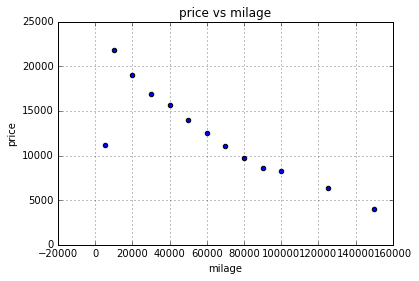

,odometer_km,price_dollars
odometer_km,1.000000,-0.884615
price_dollars,-0.884615,1.000000


In [251]:
milage = autos[['odometer_km','price_dollars']].groupby(['odometer_km']).mean()
milage = milage.reset_index()
# simple graphic to show price versus milage reliance
import matplotlib.pyplot as plt
%matplotlib inline
print(milage)
plt.scatter(milage.iloc[:,0],milage.iloc[:,1], s=100, c = 'blue')
plt.title('price vs milage')
ax = plt.gca()
ax.axis([0,160000,0,25000])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('milage')
plt.ylabel('price')
plt.show()
# correlation test
milage.corr(method='spearman')

We see now, that the link between milage and price is rather strong. It would be almost 1 if there weren't the pair '5000 - its price'. Why do we have so much decline exactly in this segment?

Let's look at the data.

P.S. I used non-parametric analog of Pearson correlation because we have not so much data for this sample (13 variables) and reliance is more ranked I suppose.

In [252]:
autos[autos['odometer_km']==5000]

,date_crawled,name,seller,offer_type,price_dollars,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
52,2016-03-25 18:50:03,Senator_A_3.0E_Karosserie_restauriert_m._viele...,privat,Angebot,3500,test,limousine,1985,NaN,112,andere,5000,0,benzin,opel,nein,2016-03-25 00:00:00,0,63500,2016-04-07 00:46:00
76,2016-03-22 14:52:57,BMW_318i_neustes_Model_0Km,privat,Angebot,31999,control,limousine,2016,manuell,136,3er,5000,2,benzin,bmw,NaN,2016-03-22 00:00:00,0,45149,2016-04-06 05:15:42
121,2016-03-15 09:48:41,verkaufe_Ford_focus_1_8_Diesel,privat,Angebot,1100,control,kombi,2002,manuell,127,focus,5000,8,diesel,ford,NaN,2016-03-15 00:00:00,0,27568,2016-03-22 08:47:10
269,2016-03-27 10:39:16,Audi_a3_8l_1_9l_TDI_in_Ebonyschwarz,privat,Angebot,1470,control,kleinwagen,1999,manuell,110,a3,5000,1,diesel,audi,nein,2016-03-27 00:00:00,0,23715,2016-04-07 05:17:10
351,2016-03-22 12:47:31,Alles_gut_bei_dese_Auto,privat,Angebot,950,control,kombi,1996,manuell,74,passat,5000,6,NaN,volkswagen,NaN,2016-03-22 00:00:00,0,53819,2016-03-29 15:46:52
403,2016-03-28 10:53:59,MINI_One_Pepper___PDC__hinten_,privat,Angebot,17695,control,kleinwagen,2015,manuell,102,one,5000,4,benzin,mini,nein,2016-03-28 00:00:00,0,7318,2016-04-06 13:44:50
428,2016-03-21 19:55:57,Audi_A3_98,privat,Angebot,1000,test,kleinwagen,1999,manuell,101,a3,5000,0,benzin,audi,ja,2016-03-21 00:00:00,0,6258,2016-03-28 17:18:38
435,2016-03-21 20:38:33,Ford_Puma_zu_verkaufen,privat,Angebot,550,control,coupe,2002,manuell,125,NaN,5000,1,benzin,ford,NaN,2016-03-21 00:00:00,0,32657,2016-04-04 21:17:01
453,2016-03-28 13:51:12,Armee_Jeep,privat,Angebot,9800,test,NaN,2016,manuell,112,andere,5000,0,NaN,jeep,NaN,2016-03-28 00:00:00,0,7545,2016-04-06 17:45:49
796,2016-03-19 01:54:39,Top_ford_focus_2003_nur_60_000km!!!!!,privat,Angebot,3100,control,limousine,2003,manuell,112,focus,5000,10,benzin,ford,NaN,2016-03-19 00:00:00,0,41238,2016-04-06 05:44:40


I guess It's because of the cars which price rather small (400 - 1000 dollars), but milage is small. Maybe it's biased milage, maybe cars are irreparably damaged or it's just a mistake. I intent to eliminate these cars and see how correlation will change. 

Logically, the approximate price for cars with milage of 5000 km. start from 300,000 rubles for the most budget models. This is equivalent to about 5 thousand dollars. Let's set this threshold and see how the correlation value will change.

In [250]:
test_df = autos[autos['price_dollars'] > 5000]
test_df = test_df[['brand','price_dollars','odometer_km']].groupby(['odometer_km']).mean()
print(test_df)
test_df.reset_index().corr(method='spearman')

             price_dollars
odometer_km               
5000          26341.854167
10000         24472.200000
20000         22758.240678
30000         19325.987692
40000         17728.004342
50000         16352.663379
60000         15848.825930
70000         14608.179302
80000         13704.270880
90000         13214.343455
100000        13280.080689
125000        11756.571637
150000        10109.410930


,odometer_km,price_dollars
odometer_km,1.000000,-0.994505
price_dollars,-0.994505,1.000000


As expected, the correlation between price and mileage equals almost 1. It's strong reliance and we may say, that despite the brands, reliance between the range of the milage and price is relevant.

# Conclusion

For this project, we have done some data analysis with the eBay dataset of the used cars. First of all, it was cleaning tasks including fixing outliers in the columns, exploring dirty data, converting needed columns from strings to numeric values, translating some variables from German to the English language, renaming columns for convenience and so on. Also, we analyzed the reliance between mileage and price using Spearman correlation test. Moreover, we found out how the included brand list nullifies all dependency between these variables. 